In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Dataindlæsning med pandas samt overview

In [3]:
sf_data         = pd.read_csv("../data/sf_data.csv", delimiter=";")
sf_districts    = pd.read_csv("../data/sf_districts.csv", delimiter=";")

In [4]:
sf_data.head(10)

,id,category,description,weekday,date,time,resolution,longitude,latitude,label
0,5069701104134,assault,battery,wednesday,06/22/2005,12:20,none,-122.428223,37.781896,violent
1,6074729204104,assault,assault,saturday,07/15/2006,00:55,none,-122.410672,37.799789,violent
2,7103536315201,assault,stalking,tuesday,09/25/2007,00:01,none,-122.458226,37.741362,violent
3,11082415274000,missing person,missing adult,saturday,09/24/2011,11:00,located,-122.459173,37.708200,other
4,4037801104134,assault,battery,friday,12/12/2003,12:00,none,-122.386667,37.789882,violent
5,4147669007025,vehicle theft,stolen truck,thursday,12/30/2004,19:00,none,-122.407531,37.723291,other
6,18030800164070,suspicious occ,suspicious occurrence,wednesday,04/25/2018,05:00,none,-122.388543,37.728789,other
7,18023216504170,assault,false imprisonment,saturday,03/24/2018,07:00,none,-122.419053,37.758632,violent
8,16028516271000,non-criminal,lost property,tuesday,03/01/2016,00:01,none,-122.431958,37.764936,other
9,17103493468020,other offenses,miscellaneous investigation,friday,12/22/2017,23:30,none,-122.431857,37.774850,other


In [5]:
sf_districts.head(10)

,id,district
0,17074762928150,sunnydale
1,17020189127170,sunnydale
2,18007948463010,sunnydale
3,18001184015200,sunnydale
4,18028426362050,sunnydale
5,17104750106302,sunnydale
6,16029802428160,sunnydale
7,18024885504013,sunnydale
8,17042159462050,sunnydale
9,17067654504134,sunnydale


## Kommentar

Der er primært 3 variabeltyper i data: 
 - Forbrydelseskategori/type
 - Tid 
 - Sted
 
Derudover er der en ekstra variabel der angiver resultat/outcome af raporten

In [6]:
{
    "sf_data_counts":             len(sf_data),
    "sf_districts_counts":        len(sf_districts),
    "sf_data_uniquecounts":       sf_data["id"].nunique(),
    "sf_districts_uniquecounts":  sf_districts["id"].nunique(),
    "common_id_counts":           len(set(sf_data["id"]) & set(sf_districts["id"])),
}

{'sf_data_counts': 2129216,
 'sf_districts_counts': 592854,
 'sf_data_uniquecounts': 2129216,
 'sf_districts_uniquecounts': 592854,
 'common_id_counts': 592854}

Så 'id' er en unik nøgle på sf_district og sf_data (ikke overraskende). 

sf_district er 1:1 med sf_data og kan joines på sf_data. 

'Some districts of interest are defined by rectangular bounding boxes in terms of latitude-longitude' - altså er sf_districts defineret ud fra latitude-longitude.

In [7]:
sf_data_joined=sf_data.merge(sf_districts, on='id')

In [8]:
sf_data_joined.head(10)

,id,category,description,weekday,date,time,resolution,longitude,latitude,label,district
0,18023216504170,assault,false imprisonment,saturday,03/24/2018,07:00,none,-122.419053,37.758632,violent,mission
1,17067335371000,non-criminal,lost property,wednesday,07/19/2017,12:00,none,-122.419672,37.765050,other,mission
2,17083623864020,non-criminal,"aided case, mental disturbed",friday,10/13/2017,06:45,none,-122.416894,37.784286,other,tenderloin
3,18029886606243,larceny/theft,petty theft from locked auto,sunday,04/22/2018,18:00,none,-122.420691,37.781483,other,tenderloin
4,16624968706372,larceny/theft,petty theft of property,sunday,08/21/2016,10:00,none,-122.417885,37.785438,other,tenderloin
5,16016298006363,larceny/theft,petty theft shoplifting,wednesday,02/24/2016,12:36,"arrest, booked",-122.406521,37.785063,other,tenderloin
6,17074762928150,vandalism,"malicious mischief, vandalism",wednesday,09/13/2017,10:00,none,-122.417145,37.712150,other,sunnydale
7,17066441564070,suspicious occ,suspicious occurrence,tuesday,08/15/2017,12:23,none,-122.409011,37.781134,other,tenderloin
8,18023272305073,burglary,"burglary, unlawful entry",sunday,03/25/2018,03:00,none,-122.410478,37.766246,other,mission
9,17071819706244,larceny/theft,grand theft from locked auto,sunday,09/03/2017,02:40,none,-122.418449,37.753027,other,mission


# Deskriptiv analyse

### Kategori

In [9]:
category_count=sf_data_joined.groupby("category").size().sort_values(ascending=False)

# top 5 kategorier
print(category_count.head())

category
larceny/theft     99205
other offenses    93381
drug/narcotic     71757
non-criminal      61517
assault           53665
dtype: int64


### District

In [10]:
district_count=sf_data_joined.groupby("district").size().sort_values(ascending=False)

print(district_count)

district
tenderloin    345423
mission       234320
sunnydale      13111
dtype: int64


Der er i alt 3 districts og det er især i tenderloin er registreret sager

### Time

In [11]:
sf_data_time=sf_data_joined.copy()
sf_data_time["date"]  = pd.to_datetime(sf_data_time["date"], format="%m/%d/%Y")
sf_data_time["month"] = sf_data_time["date"].dt.month
sf_data_time["year"]  = sf_data_time["date"].dt.year

In [12]:
{
    'min': sf_data_time["date"].min(),
    'max': sf_data_time["date"].max(),
}

{'min': Timestamp('2003-01-01 00:00:00'),
 'max': Timestamp('2018-05-15 00:00:00')}

In [13]:
time_series_daily   = sf_data_time.groupby("date").size()
time_series_monthly = sf_data_time.groupby(["year", "month"]).size()
time_series_monthly.index = [datetime(y,m,1) for y, m in time_series_monthly.index]

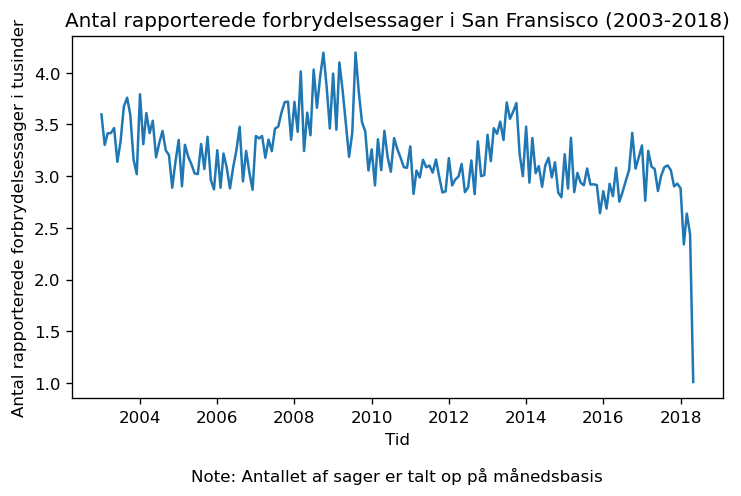

In [14]:
fig, ax = plt.subplots(dpi=120, figsize=(7,4))
sns.lineplot(data=time_series_monthly / 1000, ax=ax)
plt.title("Antal rapporterede forbrydelsessager i San Fransisco (2003-2018)")
plt.ylabel("Antal rapporterede forbrydelsessager i tusinder")
plt.xlabel("""Tid

Note: Antallet af sager er talt op på månedsbasis""");

In [15]:
weekday_count = sf_data_joined.groupby('weekday', as_index=False).size()

In [16]:
weekday_count["weekday"] = pd.Categorical(
    weekday_count["weekday"], 
    categories=["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"], 
    ordered=True
)

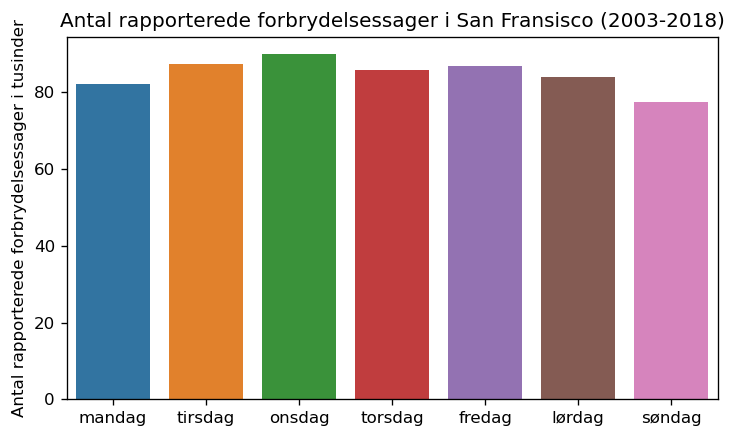

In [17]:
fig, ax = plt.subplots(dpi=120, figsize=(7,4))
sns.barplot(x=weekday_count["weekday"], y=weekday_count["size"] / 1000, ax=ax)
plt.title("Antal rapporterede forbrydelsessager i San Fransisco (2003-2018)")
plt.ylabel("Antal rapporterede forbrydelsessager i tusinder")
plt.xlabel("")
plt.xticks(range(7), ["mandag", "tirsdag", "onsdag", "torsdag", "fredag", "lørdag", "søndag"]);

### Løsninger (Resolution)

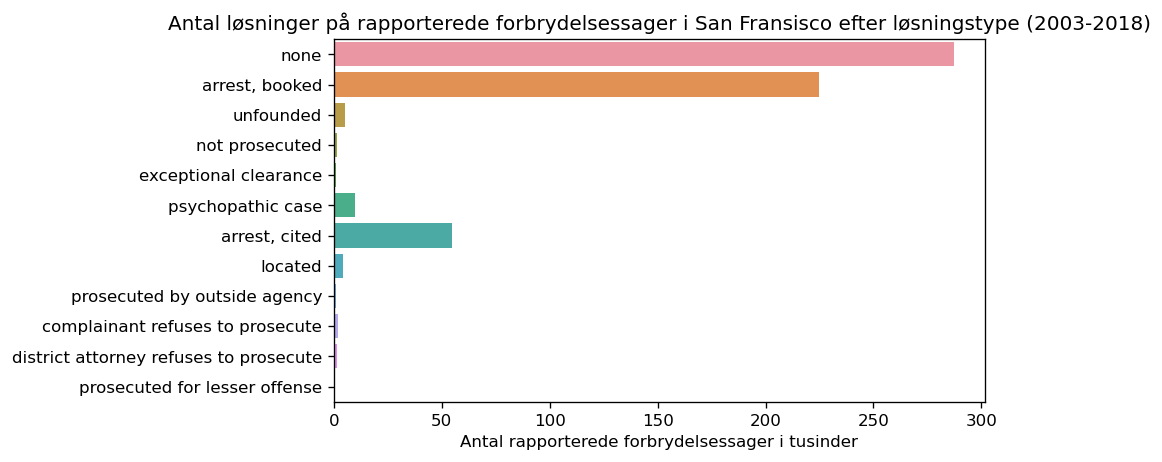

In [18]:
fig, ax = plt.subplots(dpi=120, figsize=(7,4))
sns.countplot(y=sf_data_joined["resolution"], ax=ax)
plt.title("Antal løsninger på rapporterede forbrydelsessager i San Fransisco efter løsningstype (2003-2018)")
plt.ylabel("")
plt.xlabel("Antal rapporterede forbrydelsessager i tusinder")
plt.xticks(ticks=ax.get_xticks()[:-1], labels=[int(x / 1000) for x in ax.get_xticks()][:-1]);

### Forbrydelsestype

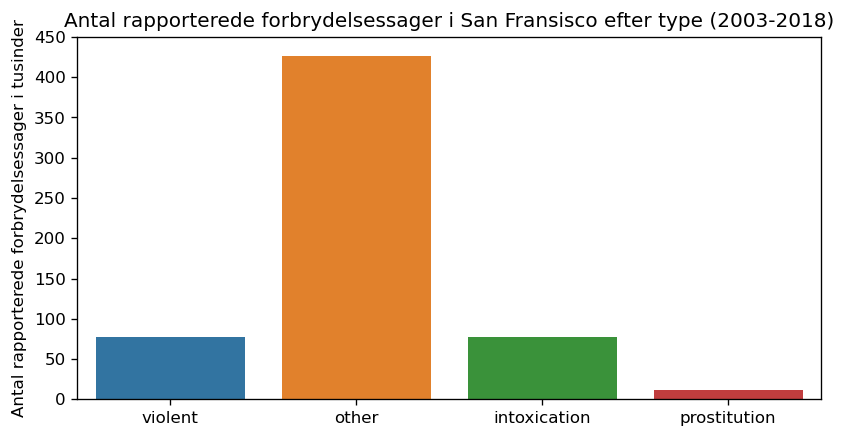

In [19]:
fig, ax = plt.subplots(dpi=120, figsize=(8,4))
sns.countplot(x=sf_data_joined["label"], ax=ax)
plt.title("Antal rapporterede forbrydelsessager i San Fransisco efter type (2003-2018)")
plt.xlabel("")
plt.ylabel("Antal rapporterede forbrydelsessager i tusinder")
plt.yticks(ticks=ax.get_yticks(), labels=[int(x / 1000) for x in ax.get_yticks()]);